In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [39]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Dataset


[Advanced exploratory data analysis (EDA)](https://miykael.github.io/blog/2022/advanced_eda/)

In [5]:
# sudo /Applications/Python\ 3.8/Install\ Certificates.command
dataset = fetch_openml(data_id=42803, as_frame=True)
# Extract feature matrix X and show 5 random samples
df_X = dataset["frame"]

# Structure investigation

In [7]:
df_X.shape
df_X.head()

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,1.0,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN
1,201501BS70002,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,5.0,3.0,9.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0
2,201501BS70004,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,6.0,3.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,6.0
3,201501BS70005,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,2.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0
4,201501BS70008,1.0,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,8.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


## DataType

In [9]:
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [13]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()
df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")
df_X.describe(exclude="number") # exclude="object"

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,09/01/2015,07:30,E09000020,E01002814


,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,363243.000000,363181.000000,362864.000000,363059.000000,363067.000000,363159.000000,363067.000000,363080.000000,363084.000000,363242.000000,...,357674.000000,363243.000000,363241.000000,363241.000000,362481.000000,363197.000000,363077.000000,363243.000000,323448.000000,293666.000000
mean,1.696203,9.756953,0.029766,12.607326,0.109233,2.609361,0.188139,0.307480,0.366689,0.546699,...,6.431284,2.875725,0.380731,0.276467,0.281027,0.066127,0.032833,7.840080,1.308186,5.107323
std,1.487094,8.315189,0.294127,6.218689,0.903131,3.249245,0.714243,1.595551,1.374107,2.094845,...,2.157860,0.355195,1.522220,1.294574,0.591239,0.493174,0.253780,7.366436,0.657776,2.829458
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


Let’s investigate how many unique values each of these feature has. This process will give us some insights about the number of binary (2 unique values), ordinal (3 to ~10 unique values) and continuous (more than 10 unique values) features in the dataset.

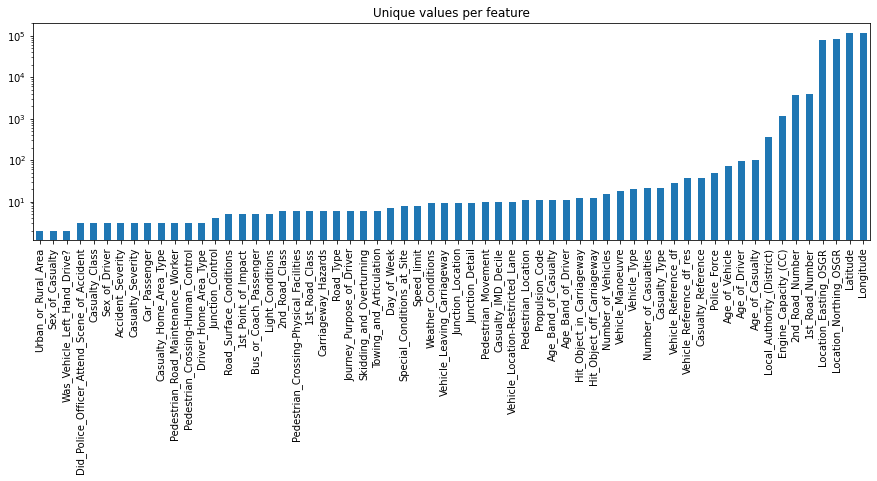

In [15]:
# For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");


# Quality Check

## Duplicates

In [ ]:
# Check number of duplicates while ignoring the index feature. Drop the index of the dataset to check duplicate content
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape


## Missing values

#### Per Sample

<AxesSubplot:>

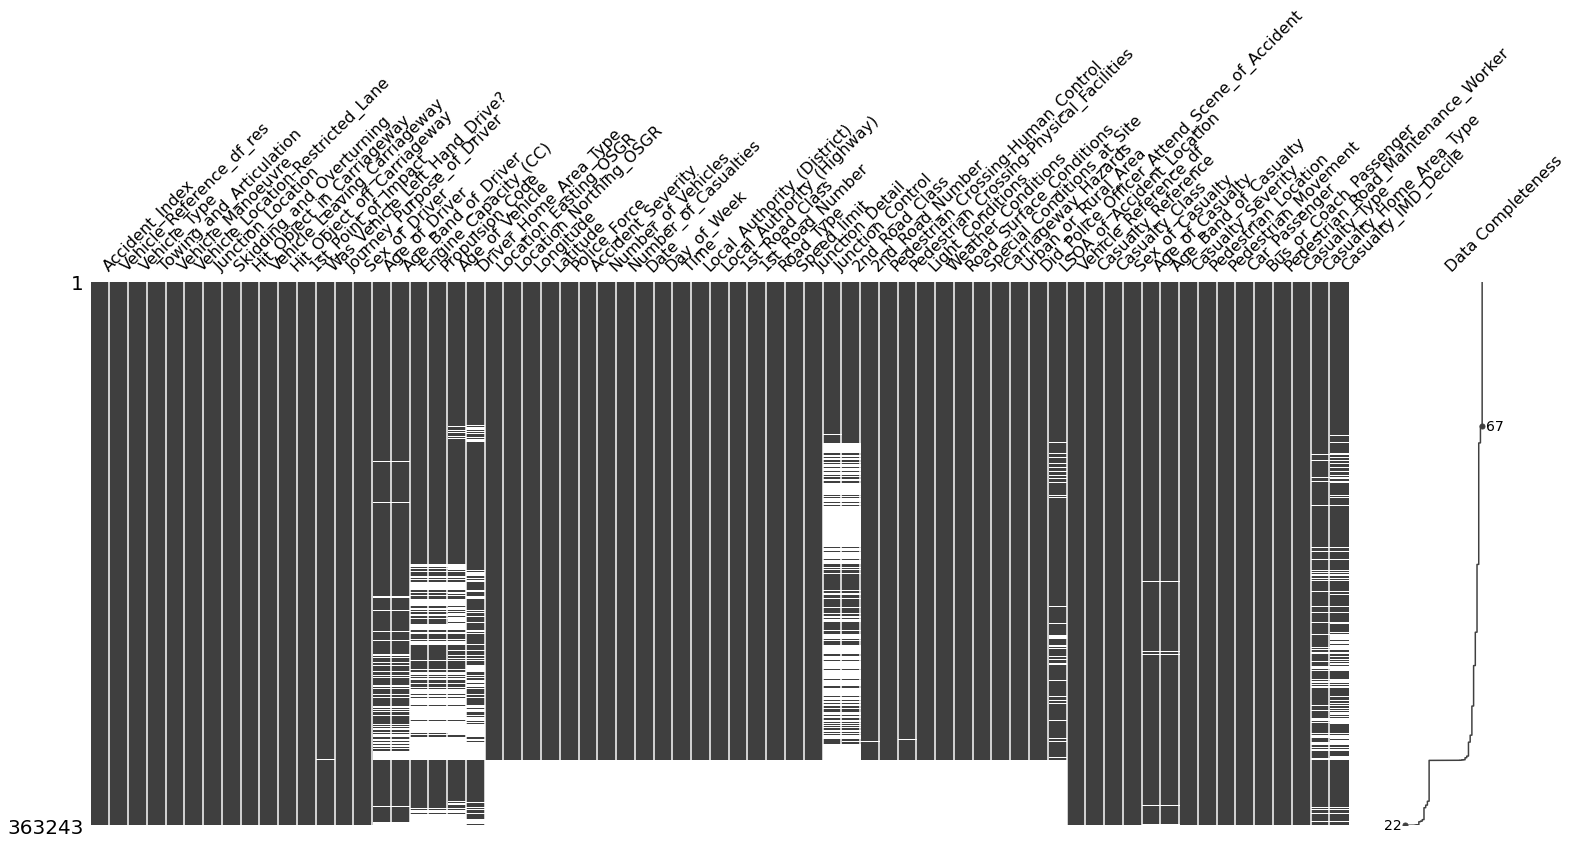

In [21]:
msno.matrix(df_X, labels=True, sort='descending')

From both of these plots we can see that the dataset has a huge whole, caused by some samples where more than 50% of the feature values are missing. For those samples, filling the missing values with some replacement values is probably not a good idea.

In [22]:
# drop samples that have more than 20% of missing values, based on previous plot
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape


(319795, 67)

#### Per Feature

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

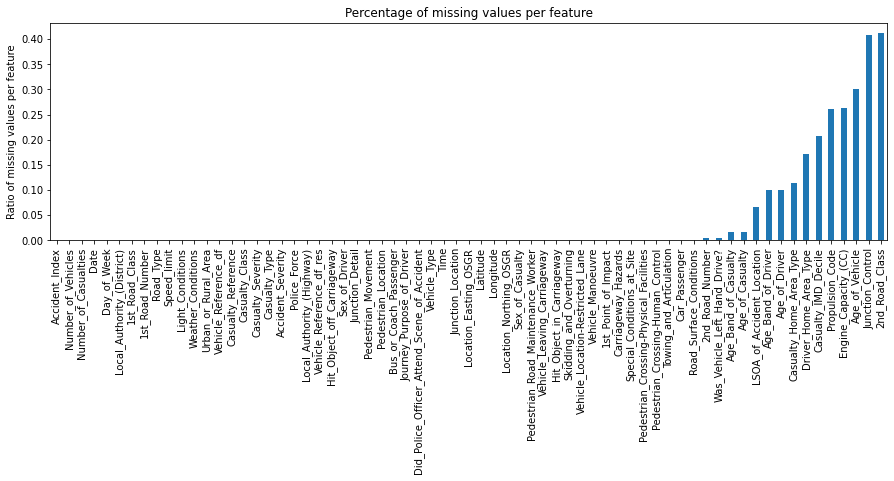

In [26]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature"
)

In [27]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)

## Unwanted entries and recording errors

### Numerical values    

To plot this global view of the dataset, at least for the numerical features, you can use pandas’ .plot() function and combine it with the following parameters:
* `lw=0`: lw stands for line width. 0 means that we don’t want to show any lines
* marker=".": Instead of lines, we tell the plot to use . as markers for each data point
* subplots=True: subplots tells pandas to plot each feature in a separate subplot
* layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 2 means to use 2 columns per row.
* figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.


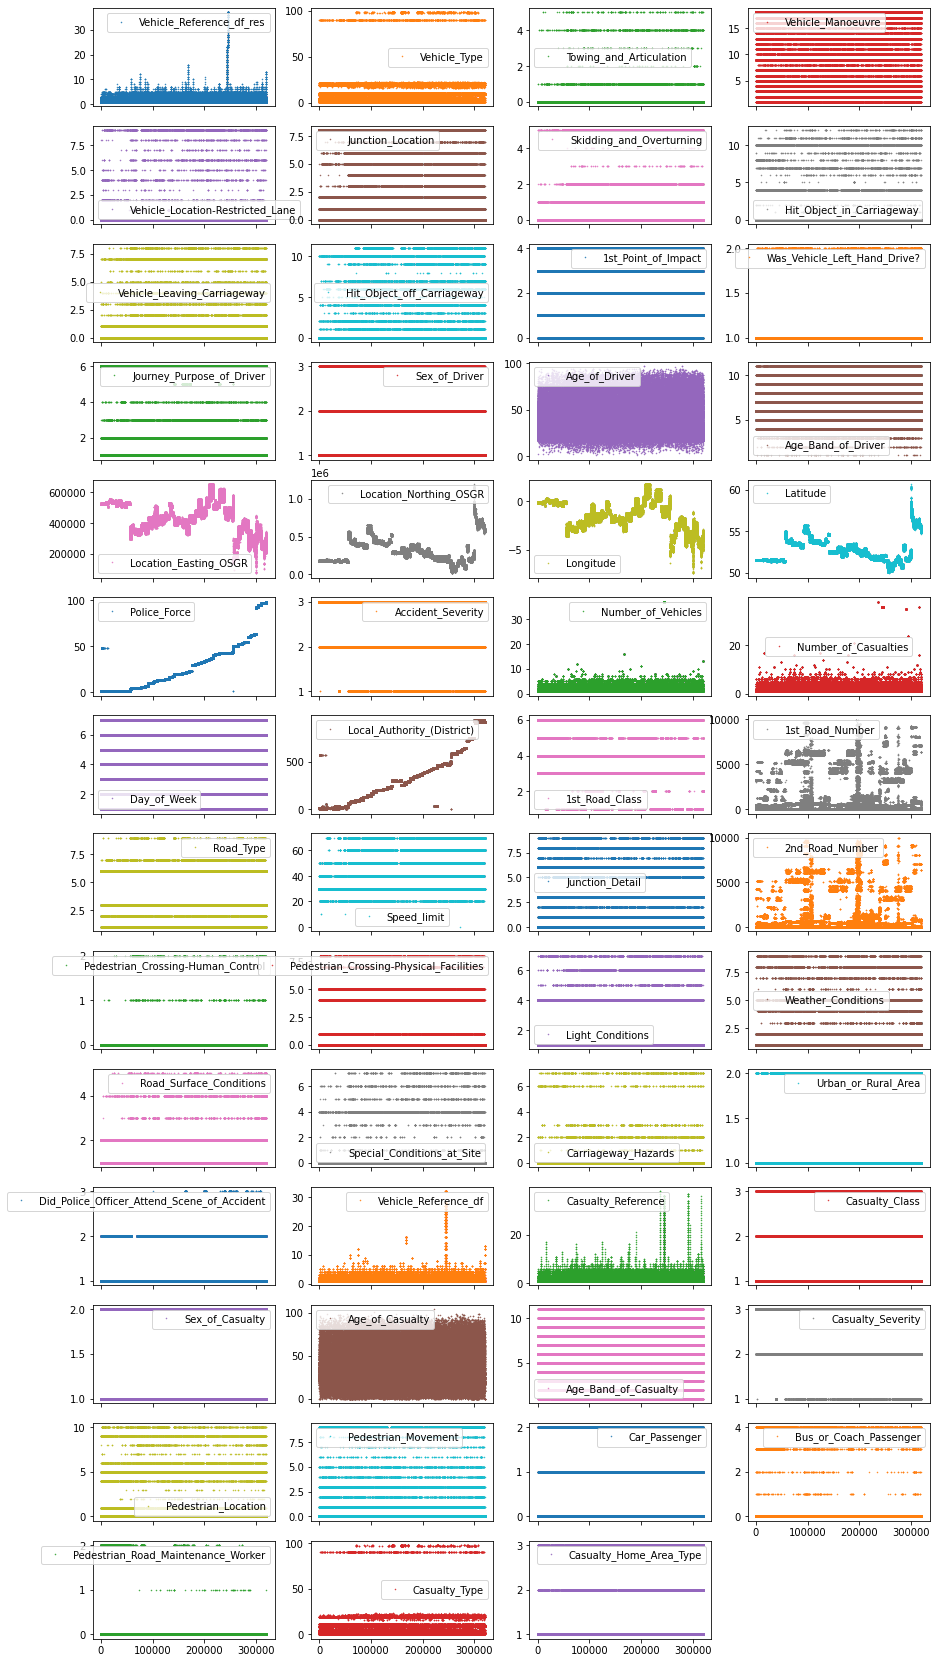

In [28]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

### Non-numerical values

Look at how many unique values each of these non-numerical features contain, and how often their most frequent category is represented.

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,319795,319795,319751,319795,298698
unique,123646,365,1439,204,25977
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2969,8457,1456


<AxesSubplot:title={'center':'Accident_Index'}>

<AxesSubplot:title={'center':'Date'}>

<AxesSubplot:title={'center':'Time'}>

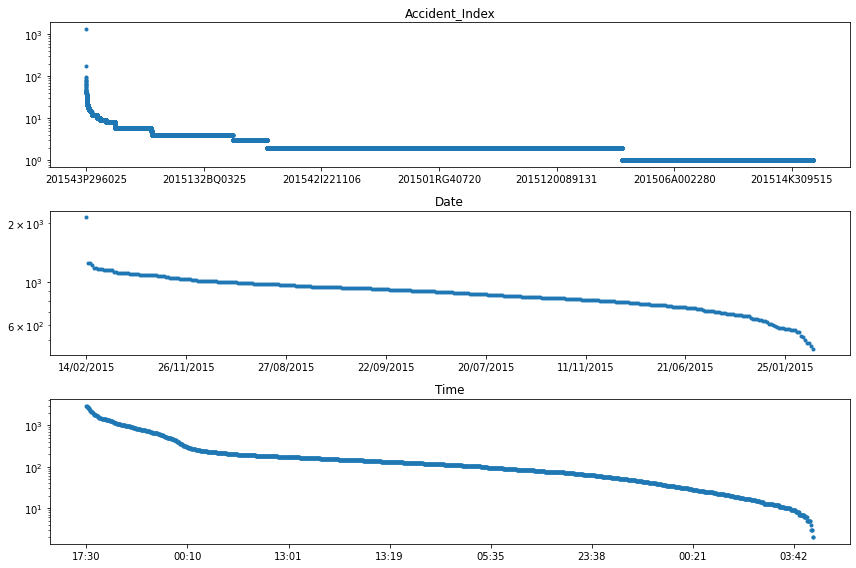

In [33]:
# Extract descriptive properties of non-numerical features
df_X.describe(exclude=["number", "datetime"])

# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout()

Remove the 10 most frequent accidents from this dataset.

In [34]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape



(317670, 60)

# Content Check

## Feature distribution

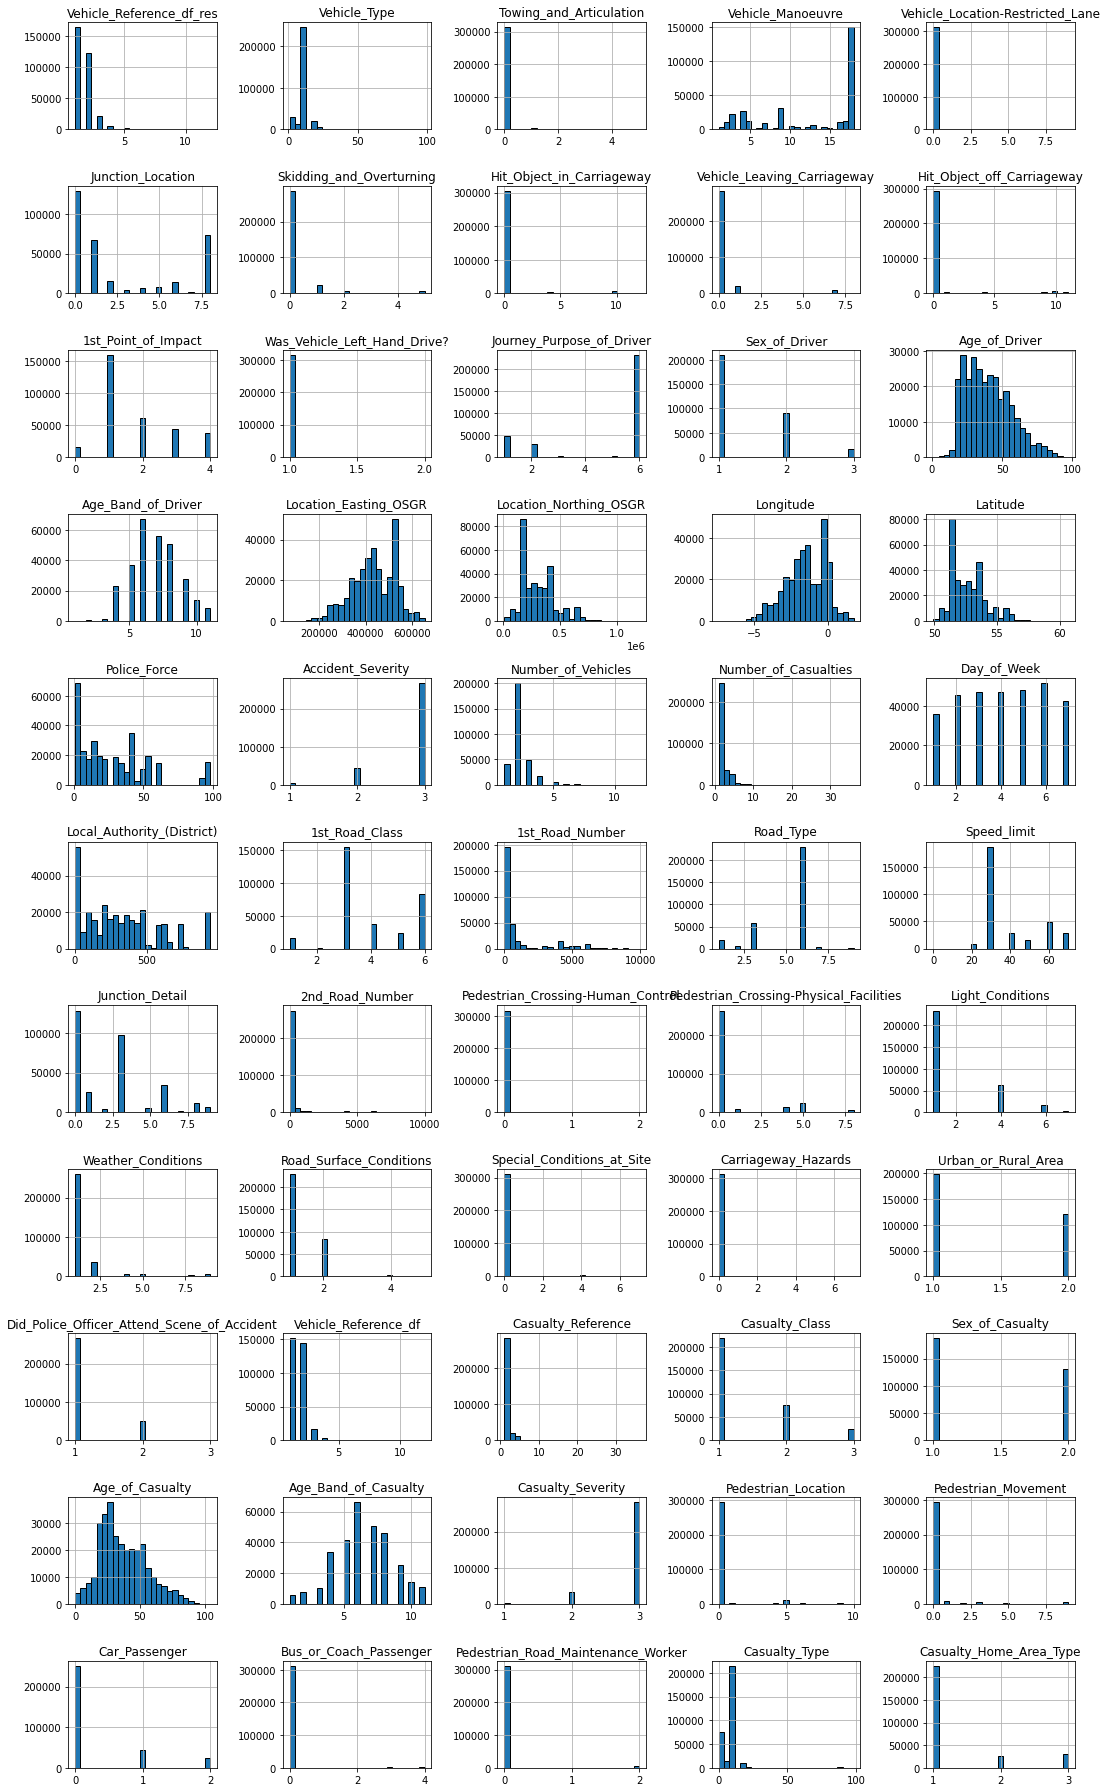

In [35]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

Most frequent entry: Some features, such as Towing_and_Articulation or Was_Vehicle_Left_Hand_Drive? mostly contain entries of just one category. Using the .mode() function, we could for example extract the ratio of the most frequent entry for each feature and visualize that information.

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990138
Carriageway_Hazards                  0.983647
Towing_and_Articulation              0.983222
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

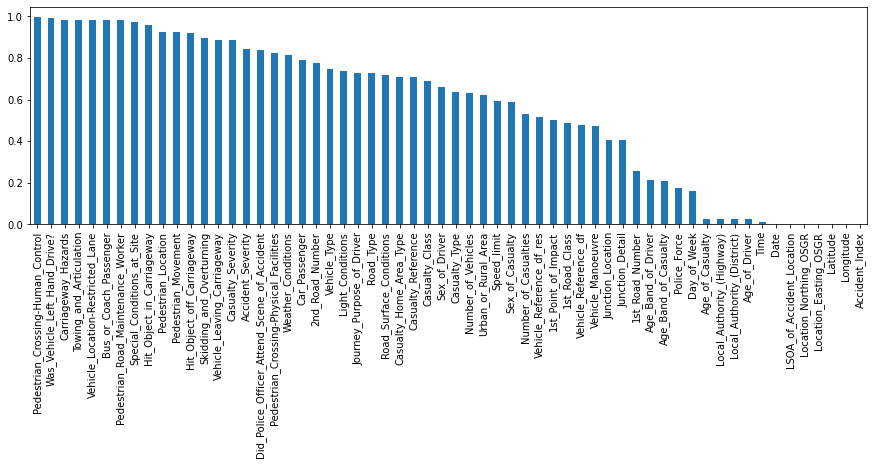

In [36]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

## Feature patterns

Let's simplify by deciding that we treat features with less than 25 unique features as discrete or ordinal features, and the other features as continuous features.

In [38]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

### Continuous feature

In [55]:
df_continuous = df_X[cols_continuous[cols_continuous].index]

Important to note, seaborn's pairplot routine can take a long time to create all subplots. Therefore we recommend to not use it for more than ~10 features at a time.

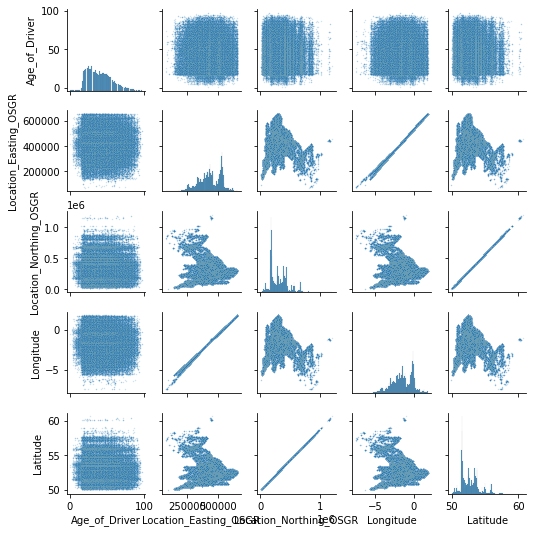

In [56]:
import seaborn as sns

sns.pairplot(df_continuous.iloc[:, :5], height=1.5, plot_kws={"s": 2, "alpha": 0.2});

### Discrete and ordinal features

Note, to spread the values out in the direction of the y-axis we need to chose one particular (hopefully informative) feature.

In [57]:
df_discrete = df_X[cols_continuous[~cols_continuous].index]

<AxesSubplot:xlabel='Vehicle_Reference_df_res', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Vehicle_Type', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Towing_and_Articulation', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Vehicle_Manoeuvre', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Vehicle_Location-Restricted_Lane', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Junction_Location', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Skidding_and_Overturning', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Hit_Object_in_Carriageway', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Vehicle_Leaving_Carriageway', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Hit_Object_off_Carriageway', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='1st_Point_of_Impact', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Was_Vehicle_Left_Hand_Drive?', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Journey_Purpose_of_Driver', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Sex_of_Driver', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Age_Band_of_Driver', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Accident_Severity', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Number_of_Vehicles', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Number_of_Casualties', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Day_of_Week', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='1st_Road_Class', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Road_Type', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Speed_limit', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Junction_Detail', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Pedestrian_Crossing-Human_Control', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Pedestrian_Crossing-Physical_Facilities', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Light_Conditions', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Weather_Conditions', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Special_Conditions_at_Site', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Carriageway_Hazards', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Did_Police_Officer_Attend_Scene_of_Accident', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Vehicle_Reference_df', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Casualty_Class', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Sex_of_Casualty', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Age_Band_of_Casualty', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Casualty_Severity', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Pedestrian_Location', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Pedestrian_Movement', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Car_Passenger', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Bus_or_Coach_Passenger', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Pedestrian_Road_Maintenance_Worker', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Casualty_Type', ylabel='Age_of_Driver'>

<AxesSubplot:xlabel='Casualty_Home_Area_Type', ylabel='Age_of_Driver'>

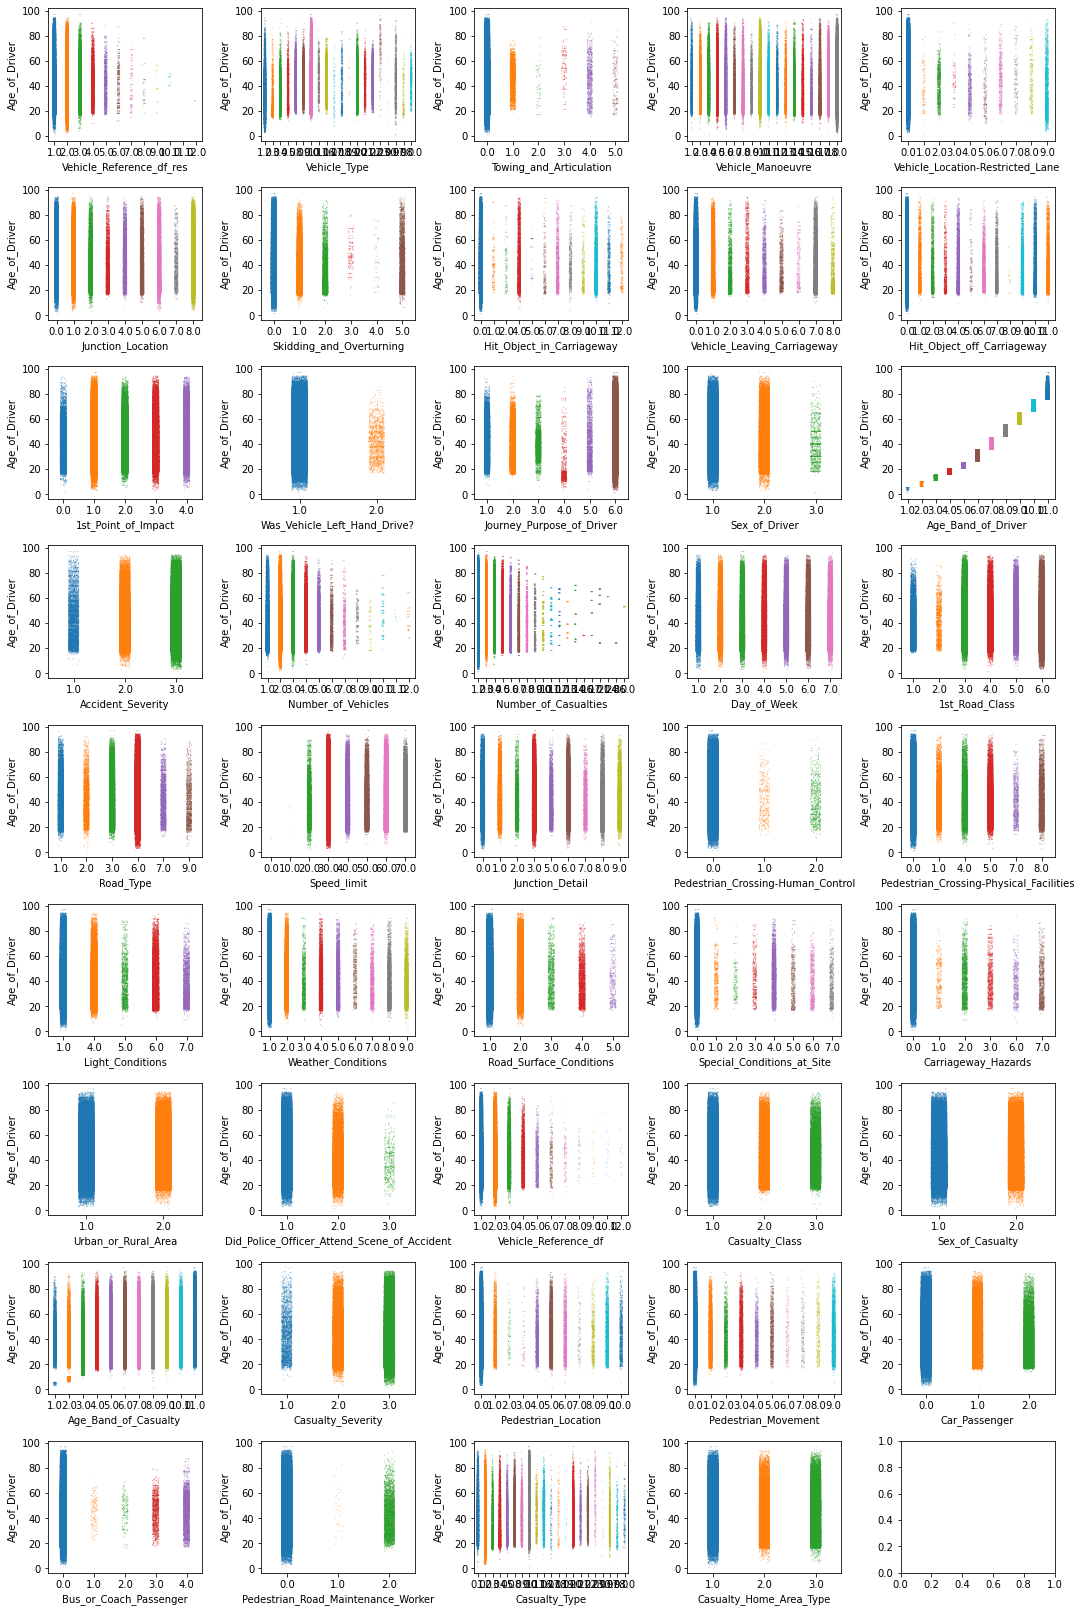

In [61]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()): # axes.ravel returns a view of the original array whenever possible. This isn't visible in the printed output, but if you modify the array returned by ravel, it may modify the entries in the original array. 
    # axes.flatten returns a copy 
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
fig.tight_layout()